# Datação de pinturas na caverna de Lascaux, França

Para se poder estimar a época em que foram feitas as pinturas que decoram as paredes da caverna de Lascaux, na França, foi analisada uma amostra do carvão utilizado nos desenhos. Esta análise revelou uma atividade de decomposição de 0,97 dpm/g (decomposição por minuto em um grama). Semelhante análise do carvão produzido da madeira viva mais abundante na região, feita em 1950, apresentou um resultado de 6,68 dpm/g. Estimar a idade das pinturas.

## Solução Analítica do 

![Solução Analítica](solucao-analitica-pvi-2.png)


Referências: BASSANEZI, R.; CASTRO, W. Equações diferenciais com aplicações.

## Solução Computacional do Problema
### Imports

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Funções auxiliares

In [7]:
# Gerar intervalo [a, b] com pontos com espaçamento h
def generate_interval(a, b, h):
    return np.arange(a, b + h, h)


# Calcular Erro Absoluto
def local_error(exact, approximate):
    return np.abs(exact - approximate)


# Calcular Erro Relativo
def relative_error(exact, approximate):
    return np.abs((exact - approximate) / exact)


# Gera um dicionário com os resultados formatados
def format_dict(dict):
    new_dict = {}
    for key, value in dict.items():
        arr = []
        for i in value:
            arr.append(str(i).replace(".", ",").replace("[", "").replace("]", ""))
            new_dict[key] = arr
    return new_dict

### Problema

In [8]:
# A equação diferencial do problema
def dydt(t, y, gama):
    return -gama * y

# A solução analítica do problema
def solucao_analitica(t, y0, gama):
    return y0 * np.exp(-gama * t)

# Método de Euler 
def euler(t0, t1, y0, gama, h):
    t = t0
    y = [y0]
    n = int((t1 - t0) / h)
    for i in range(n):
        y.append(y[i] + h * dydt(t, y[i], gama))
        t += h
    return y

# Método de Euler Implícito
def euler_implicito(t0, t1, y0, gama, h):
    t = t0
    y = [y0]
    n = int((t1 - t0) / h)
    for i in range(n):
        y.append(y[i] / (1 + h * gama))
        t += h
    return y

# Método de Euler Melhorado
def euler_melhorado(t0, t1, y0, gama, h):
    t = t0
    y = [y0]
    n = int((t1 - t0) / h)
    for i in range(n):
        y.append(y[i] + h * dydt(t, y[i], gama))
        y[i + 1] = y[i] + h / 2 * (dydt(t, y[i], gama) + dydt(t + h, y[i + 1], gama))
        t += h
    return y

# Método de Runge-Kutta de 4ª ordem
def runge_kutta(t0, t1, y0, gama, h):
    t = t0
    y = [y0]
    n = int((t1 - t0) / h)
    for i in range(n):
        k1 = dydt(t, y[i], gama)
        k2 = dydt(t + h / 2, y[i] + h / 2 * k1, gama)
        k3 = dydt(t + h / 2, y[i] + h / 2 * k2, gama)
        k4 = dydt(t + h, y[i] + h * k3, gama)
        y.append(y[i] + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4))
        t += h
    return y

# Estima o tempo t em que y(t) >= yf
def estimate_t(y, yf):
    for yi in y:
        if yi <= yf:
            return y.index(yi), yi
    return None, None

### Resultados

Tempo estimado pelo método de Euler:  15946
Tempo estimado pelo método de Euler Implícito:  15948
Tempo estimado pelo método de Euler Melhorado:  15947
Tempo estimado pelo método de Runge-Kutta:  15947


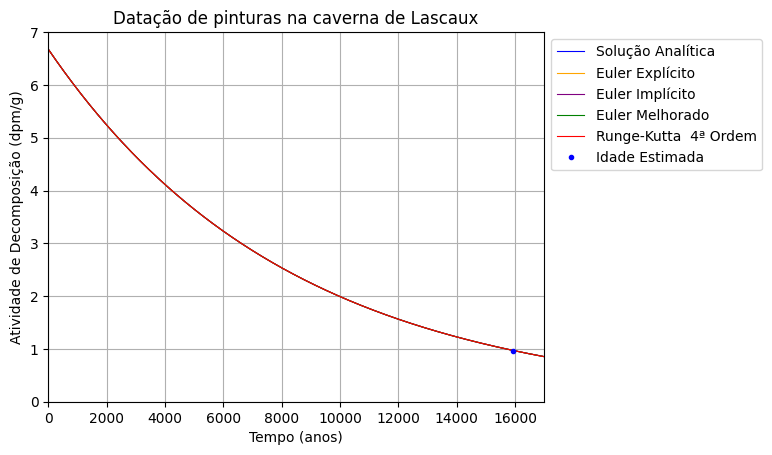

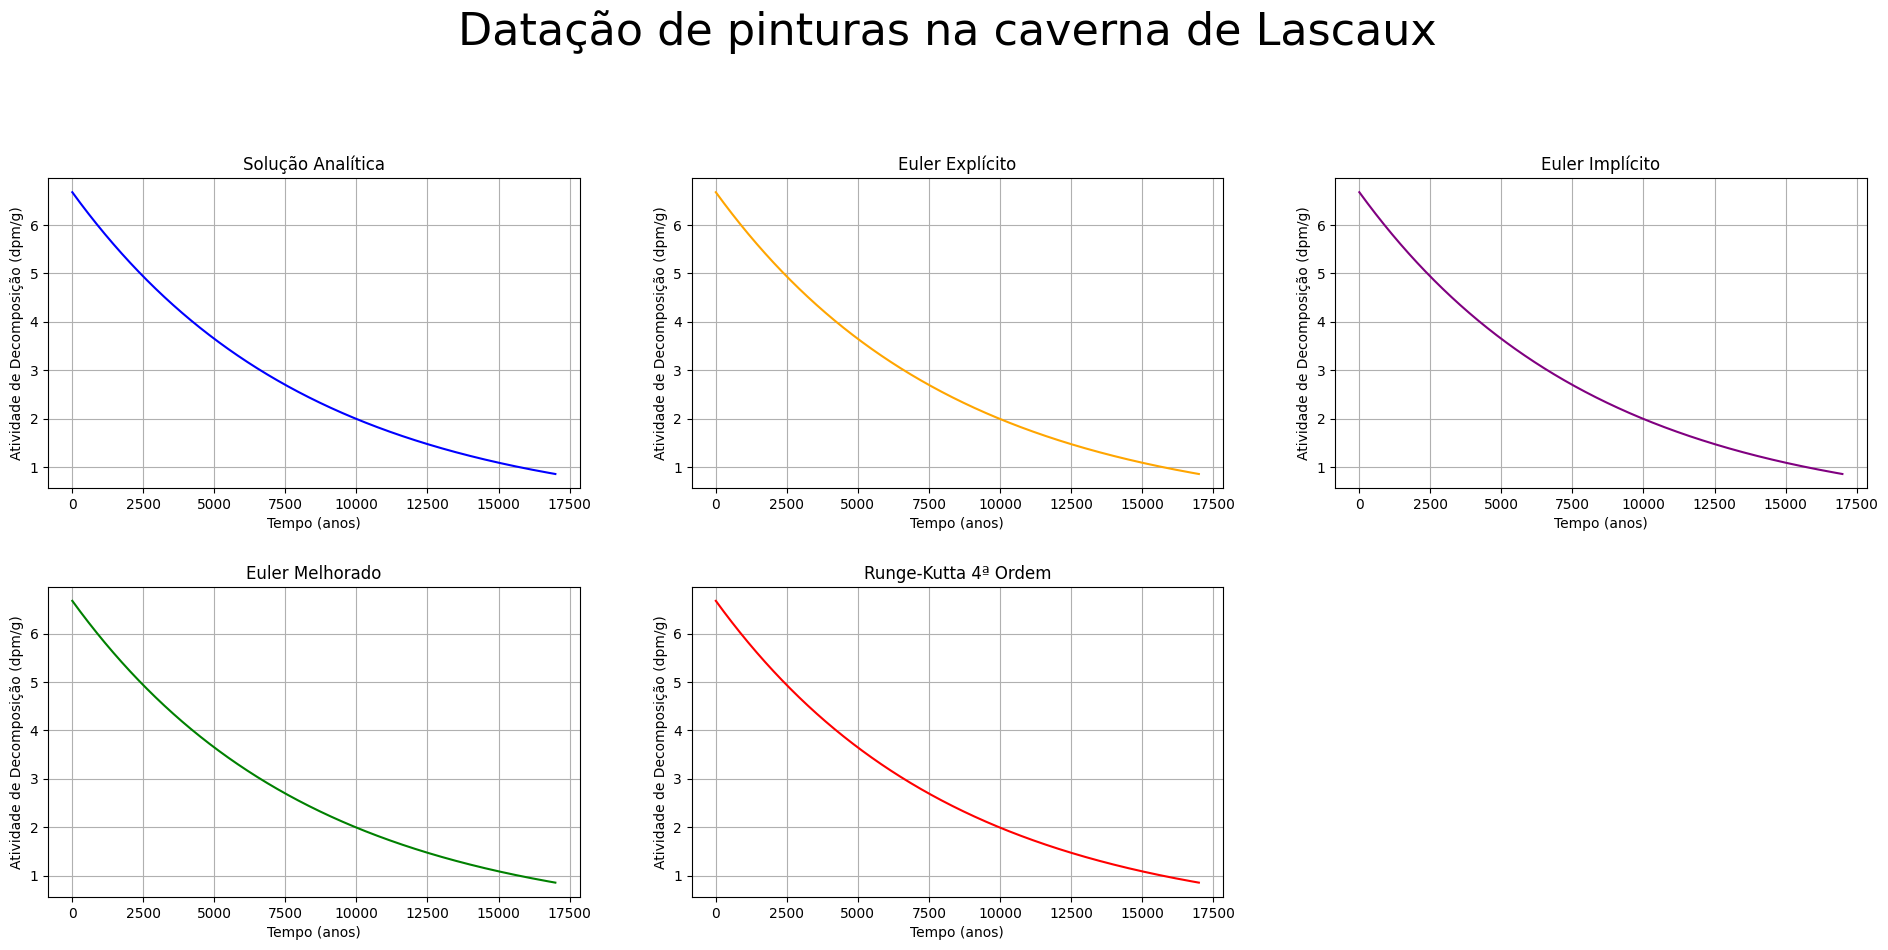

In [9]:
h = 1 # Espaçamento entre os pontos (1 ano)
t0 = 0 # Tempo inicial
t1 = 17000 # Tempo final
t_exato = 15947 # Tempo obtido através da solução analítica do problema
t = generate_interval(t0, t1, h)

gama = 0.000121 # Constante de decaimento do carbono-14

y0 = 6.68 # Atividade de decomposição inicial (y(0) = 6.68 dpm/g)
yf = 0.97 # Atividade de decomposição final (y(t) = 0.97 dpm/g)

# Calcula a solução analítica e as soluções aproximadas pelos métodos
y_analitico = solucao_analitica(t, y0, gama)
y_euler = euler(t0, t1, y0, gama, h)
y_euler_impl = euler_implicito(t0, t1, y0, gama, h)
y_euler_melhorado = euler_melhorado(t0, t1, y0, gama, h)
y_runge_kutta = runge_kutta(t0, t1, y0, gama, h)

# Exibe a idade para solucionar o problema estimada por cada método
t_estimado, y_estimado = estimate_t(y_euler, yf)
print("Tempo estimado pelo método de Euler: ", t_estimado)
t_estimado, y_estimado = estimate_t(y_euler_impl, yf)
print("Tempo estimado pelo método de Euler Implícito: ", t_estimado)
t_estimado, y_estimado = estimate_t(y_euler_melhorado, yf)
print("Tempo estimado pelo método de Euler Melhorado: ", t_estimado)
t_estimado, y_estimado = estimate_t(y_runge_kutta, yf)
print("Tempo estimado pelo método de Runge-Kutta: ", t_estimado)

# Plota um gráfico com os resultados
plt.title('Datação de pinturas na caverna de Lascaux')
plt.xlabel('Tempo (anos)')
plt.ylabel('Atividade de Decomposição (dpm/g)')
plt.grid(True)
plt.plot(t, y_analitico, 'blue', linewidth=0.8, label='Solução Analítica')
plt.plot(t, y_euler, 'orange', linewidth=0.8, label='Euler Explícito')
plt.plot(t, y_euler_impl, 'purple', linewidth=0.8, label='Euler Implícito')
plt.plot(t, y_euler_melhorado, 'green', linewidth=0.8, label='Euler Melhorado')
plt.plot(t, y_runge_kutta, 'red',  linewidth=0.8, label='Runge-Kutta  4ª Ordem')
plt.plot(t_estimado, y_estimado, 'b.', label='Idade Estimada')
plt.xlim(0, 17000)
plt.ylim(0, 7)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

# Cria subplots para cada método
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('Datação de pinturas na caverna de Lascaux', fontsize=32)
fig.delaxes(axs[1, 2])
fig.tight_layout(pad=5.0)
axs[0, 0].plot(t, y_analitico, 'blue', linewidth=1.5)
axs[0, 0].set_title('Solução Analítica')
axs[0, 0].grid(True)
axs[0, 1].plot(t, y_euler, 'orange', linewidth=1.5)
axs[0, 1].set_title('Euler Explícito')
axs[0, 1].grid(True)
axs[0, 2].plot(t, y_euler_impl, 'purple', linewidth=1.5)
axs[0, 2].set_title('Euler Implícito')
axs[0, 2].grid(True)
axs[1, 0].plot(t, y_euler_melhorado, 'green', linewidth=1.5)
axs[1, 0].set_title('Euler Melhorado')
axs[1, 0].grid(True)
axs[1, 1].plot(t, y_runge_kutta, 'red', linewidth=1.5)
axs[1, 1].set_title('Runge-Kutta 4ª Ordem')
axs[1, 1].grid(True)
for ax in axs.flat:
    ax.set(xlabel='Tempo (anos)', ylabel='Atividade de Decomposição (dpm/g)')
plt.show()

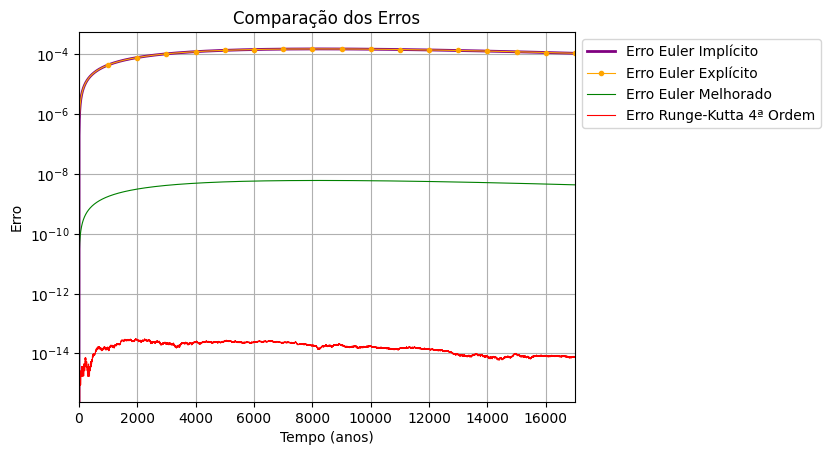

In [10]:
# Calcula os erros de cada método
erro_euler = local_error(y_analitico, y_euler)
erro_euler_melhorado = local_error(y_analitico, y_euler_melhorado)
erro_runge_kutta = local_error(y_analitico, y_runge_kutta)
erro_euler_impl = local_error(y_analitico, y_euler_impl)

# Plota um gráfico com os erros de cada método
plt.title('Comparação dos Erros')
plt.xlabel('Tempo (anos)')
plt.ylabel('Erro')
plt.grid(True)
plt.plot(t, erro_euler_impl, 'purple', linewidth=2, label='Erro Euler Implícito')
plt.plot(t, erro_euler, 'orange', marker='.', markevery=1000, linewidth=0.8, label='Erro Euler Explícito')
plt.plot(t, erro_euler_melhorado, 'green', linewidth=0.8, label='Erro Euler Melhorado')
plt.plot(t, erro_runge_kutta, 'red', linewidth=0.8, label='Erro Runge-Kutta 4ª Ordem')
plt.yscale('log')
plt.xlim(0, 17000)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

## Análise dos Métodos

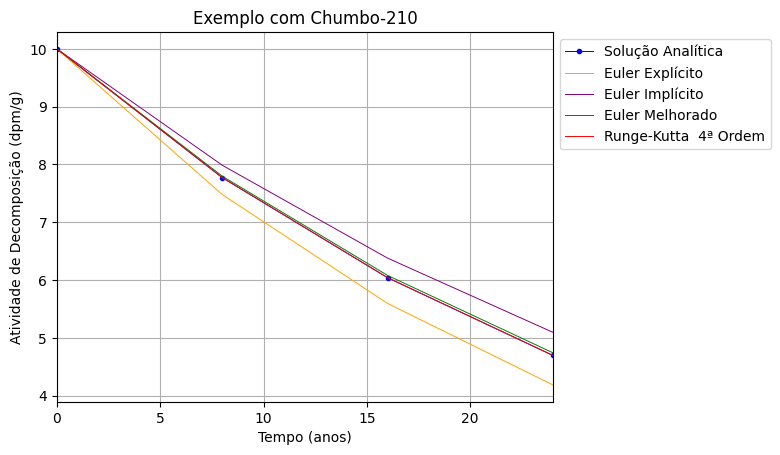

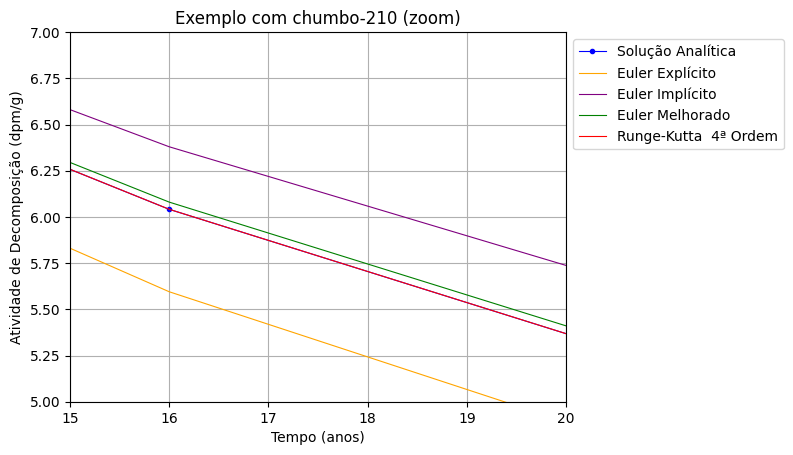

In [11]:
# Outro exemplo
h = 8 # Espaçamento entre os pontos (8 anos)
t0 = 0 # Tempo inicial
t1 = 24 # Tempo final (Meia vida do chumbo)
t = generate_interval(t0, t1, h) 

gama = 0.0315 # Constante de decaimento do chumbo-210

y0 = 10 # Atividade de decomposição inicial (y(0) = 10 dpm/g)

# Calcula a solução analítica e as soluções aproximadas pelos métodos
y_analitico = solucao_analitica(t, y0, gama)
y_euler = euler(t0, t1, y0, gama, h)
y_euler_impl = euler_implicito(t0, t1, y0, gama, h)
y_euler_melhorado = euler_melhorado(t0, t1, y0, gama, h)
y_runge_kutta = runge_kutta(t0, t1, y0, gama, h)

# Plota um gráfico com os resultados
plt.title('Exemplo com Chumbo-210')
plt.xlabel('Tempo (anos)')
plt.ylabel('Atividade de Decomposição (dpm/g)')
plt.grid(True)
plt.plot(t, y_analitico, 'blue', marker='.', linewidth=0.7, label='Solução Analítica')
plt.plot(t, y_euler, 'orange', linewidth=0.7, label='Euler Explícito')
plt.plot(t, y_euler_impl, 'purple', linewidth=0.7, label='Euler Implícito')
plt.plot(t, y_euler_melhorado, 'green', linewidth=0.7, label='Euler Melhorado')
plt.plot(t, y_runge_kutta, 'red', linewidth=0.7, label='Runge-Kutta  4ª Ordem')
plt.xlim(0, 24)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

# Plota um gráfico com os resultados (zoom)
plt.title('Exemplo com chumbo-210 (zoom)')
plt.xlabel('Tempo (anos)')
plt.ylabel('Atividade de Decomposição (dpm/g)')
plt.grid(True)
plt.plot(t, y_analitico, 'blue', marker='.', linewidth=0.8, label='Solução Analítica')
plt.plot(t, y_euler, 'orange', linewidth=0.8, label='Euler Explícito')
plt.plot(t, y_euler_impl, 'purple', linewidth=0.8, label='Euler Implícito')
plt.plot(t, y_euler_melhorado, 'green', linewidth=0.8, label='Euler Melhorado')
plt.plot(t, y_runge_kutta, 'red', linewidth=0.8, label='Runge-Kutta  4ª Ordem')
plt.xlim(15, 20)
plt.ylim(5, 7)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()